In [3]:
"""i/p
--filter (convolutional op) 
-- filltered img 
-- Relu
--Pooling layer
-- CL2
--CL3
--flattened
--FCNN
--o/p"""

'i/p\n--filter (convolutional op) \n-- filltered img \n-- Relu\n--Pooling layer\n-- CL2\n--CL3\n--flattened\n--FCNN\n--o/p'

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [5]:
(train_images, train_labels), (test_images, test_labels) \
= fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',\
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
train_labels.shape

(60000,)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
"""
Label   Description
0         T-shirt/top
1         Trouser
2         Pullover
3         Dress
4         Coat
5         Sandal
6         Shirt
7         Sneaker
8         Bag
9         Ankle boot 
"""

'\nLabel   Description\n0         T-shirt/top\n1         Trouser\n2         Pullover\n3         Dress\n4         Coat\n5         Sandal\n6         Shirt\n7         Sneaker\n8         Bag\n9         Ankle boot \n'

In [12]:
train_labels[2]

0

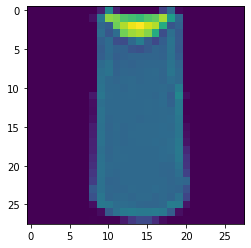

In [13]:
plt.figure()
plt.imshow(np.squeeze(train_images[2]))

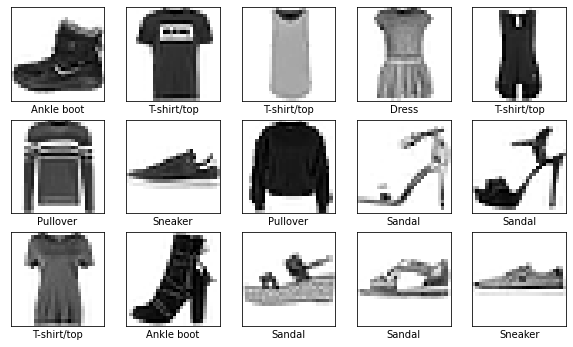

In [14]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [16]:
train_images=train_images/255.0

In [17]:
test_images=test_images/255.0

In [18]:
# First convolutional layer. 
# Number of neurons = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1

In [19]:
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )

In [20]:
# Second convolutional layer. 
# Number of neurons = 64
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv1 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [21]:
# Third convolutional layer. 
# Number of neurons = 128
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv2 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv3 = layers.Conv2D(128, (3,3), activation='relu')

In [22]:
# Max Pool Layer
# Since input to CNN is a 2-D image and ouput from last convolutional layer (featuerMap) is also 2-D array 
# (except the third dimension i.e. channels), we will use 2D version of Max Pooling function of TensorFlow Keras
# to create a Max Pooling Layer, as shown below filter (kernel) size for Pooling Layer = 2x2

#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))

In [23]:
flat_layer = layers.Flatten()

In [24]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer

fc = layers.Dense(128, activation='relu')



In [25]:
# Output Layer - with 10 neurons (as we have 10 output classes) and using 'softmax' function

output = layers.Dense(10, 'softmax')

In [26]:
model = models.Sequential()
model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=20, \
          batch_size=512, shuffle=True, validation_split=0.1)

Epoch 1/20
106/106 [==============================] - 217s 2s/step - loss: 0.5926 - accuracy: 0.7913 - val_loss: 0.3746 - val_accuracy: 0.8662
Epoch 2/20
106/106 [==============================] - 213s 2s/step - loss: 0.3246 - accuracy: 0.8848 - val_loss: 0.2992 - val_accuracy: 0.8953
Epoch 3/20
106/106 [==============================] - 225s 2s/step - loss: 0.2699 - accuracy: 0.9021 - val_loss: 0.2686 - val_accuracy: 0.9057
Epoch 4/20
106/106 [==============================] - 211s 2s/step - loss: 0.2259 - accuracy: 0.9186 - val_loss: 0.2535 - val_accuracy: 0.9063
Epoch 5/20
106/106 [==============================] - 180s 2s/step - loss: 0.2016 - accuracy: 0.9267 - val_loss: 0.2410 - val_accuracy: 0.9133
Epoch 6/20
106/106 [==============================] - 153s 1s/step - loss: 0.1758 - accuracy: 0.9363 - val_loss: 0.2620 - val_accuracy: 0.9057
Epoch 7/20
106/106 [==============================] - 154s 1s/step - loss: 0.1587 - accuracy: 0.9421 - val_loss: 0.2379 - val_accuracy: 0.9163

In [32]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.4417 - accuracy: 0.9177


[0.4416950047016144, 0.9176999926567078]

In [33]:
pred_labels=model.predict(test_images)

In [34]:
pred_labels[0]

array([3.6539011e-15, 4.5950826e-14, 1.7370377e-15, 2.9016831e-14,
       3.9510620e-13, 2.2833317e-08, 4.2403905e-17, 2.0584281e-08,
       5.7399276e-14, 1.0000000e+00], dtype=float32)

In [35]:
pred_labels_classes=model.predict_classes(test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [36]:
pred_labels_classes[0]

9

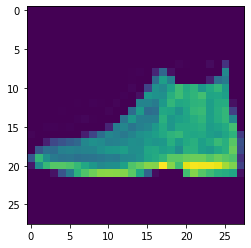

In [37]:
plt.figure()
plt.imshow(np.squeeze(test_images[0]))

In [38]:
from sklearn.metrics import confusion_matrix 
cf=confusion_matrix(test_labels,pred_labels_classes)
cf

array([[838,   1,  26,  10,   3,   1, 116,   0,   5,   0],
       [  3, 977,   1,  10,   2,   0,   6,   0,   1,   0],
       [ 18,   0, 894,   6,  31,   0,  51,   0,   0,   0],
       [ 16,   0,  17, 890,  27,   0,  49,   0,   1,   0],
       [  1,   1,  54,  18, 852,   0,  73,   0,   1,   0],
       [  0,   0,   0,   1,   0, 985,   0,  10,   0,   4],
       [ 57,   1,  48,  10,  49,   0, 829,   0,   6,   0],
       [  0,   0,   0,   0,   0,   8,   0, 974,   0,  18],
       [  4,   0,   3,   6,   0,   1,   3,   5, 977,   1],
       [  0,   0,   0,   0,   0,   7,   0,  32,   0, 961]], dtype=int64)

In [ ]:
#tf.saved_model.save(model, path_to_dir)
#model = tf.saved_model.load(path_to_dir)

(10.0, 0.0)

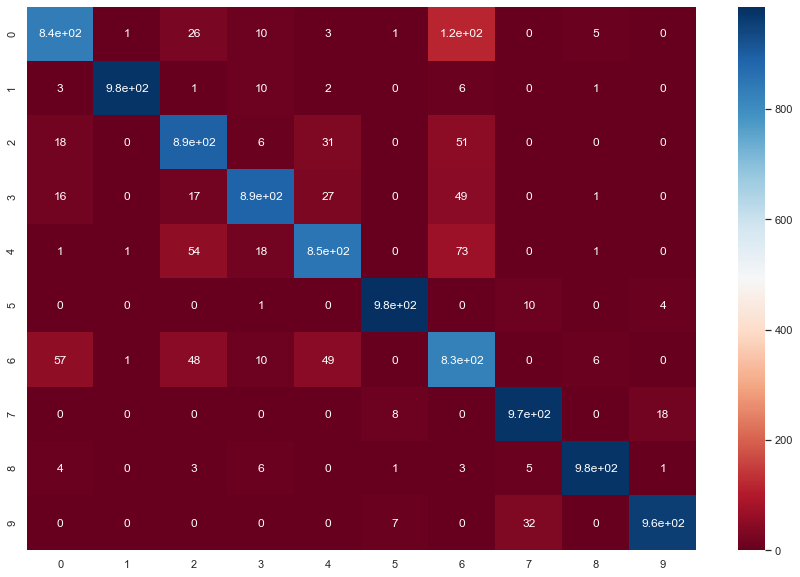

In [39]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.heatmap(cf, annot=True,cmap='RdBu')
ax.set_ylim(10,0) 


In [ ]:
mapper={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

In [ ]:
"""
Label   Description
0         T-shirt/top
1         Trouser
2         Pullover
3         Dress
4         Coat
5         Sandal
6         Shirt
7         Sneaker
8         Bag
9         Ankle boot 
"""

In [ ]:
type(test_labels)

In [ ]:
test=[mapper[items] for items in test_labels]
pred=[mapper[items] for items in pred_labels_classes]

In [ ]:
pred

In [ ]:
confusion_matrix(test,pred)

In [ ]:
lst=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
sns.heatmap(confusion_matrix(test,pred),annot=True)

In [ ]:
ax=sns.heatmap(confusion_matrix(test,pred),annot=True,xticklabels=lst,yticklabels=lst)
ax.set_ylim(10,0)